In [1]:
import pickle
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
C:\Users\1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
nb_classes = 4

In [3]:
data = pickle.load(open("genre.pickle","rb"))
y = data[0]
x = data[1]

In [4]:
y = keras.utils.np_utils.to_categorical(y,nb_classes)
in_size = x[0].shape[0]

In [5]:
in_size

37414

In [6]:
x[0]

array([0.05599533, 0.03647884, 0.02345133, ..., 0.        , 0.        ,
       0.        ])

In [7]:
x

[array([0.05599533, 0.03647884, 0.02345133, ..., 0.        , 0.        ,
        0.        ]),
 array([0.05330424, 0.02083542, 0.01339457, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.01848564, 0.00903202, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00843205, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.04871215, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.08512943, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.01135338, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.01096487, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.04179362, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0.,

In [8]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size = 0.2)

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, y_train, batch_size = 128,
                epochs=20,
                verbose=1,
                validation_data=(x_test, y_test))

Train on 2557 samples, validate on 640 samples
Epoch 1/20
2557/2557 [==============================] - 22s 9ms/step - loss: 0.8521 - acc: 0.7305 - val_loss: 0.4253 - val_acc: 0.8609
Epoch 2/20
2557/2557 [==============================] - 19s 7ms/step - loss: 0.2390 - acc: 0.9300 - val_loss: 0.3427 - val_acc: 0.8828
Epoch 3/20
2557/2557 [==============================] - 19s 7ms/step - loss: 0.1063 - acc: 0.9703 - val_loss: 0.3131 - val_acc: 0.9000
Epoch 4/20
2557/2557 [==============================] - 19s 7ms/step - loss: 0.0475 - acc: 0.9851 - val_loss: 0.3417 - val_acc: 0.8922
Epoch 5/20
2557/2557 [==============================] - 19s 7ms/step - loss: 0.0222 - acc: 0.9945 - val_loss: 0.3376 - val_acc: 0.9000
Epoch 6/20
2557/2557 [==============================] - 19s 7ms/step - loss: 0.0112 - acc: 0.9973 - val_loss: 0.3912 - val_acc: 0.8938
Epoch 7/20
2557/2557 [==============================] - 19s 8ms/step - loss: 0.0079 - acc: 0.9965 - val_loss: 0.3947 - val_acc: 0.8969
Epoch 8/

In [13]:
score = model.evaluate(x_test, y_test, verbose=1)
print("정답률 :", score[1], "loss :", score[0])

640/640 [==============================] - 2s 3ms/step
정답률 : 0.9046875 loss : 0.6338570535182952


In [14]:
model.save_weights('./genre-model.hdf5')

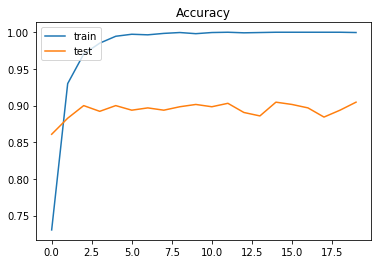

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()